In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os import system as sys

import pyproj
from geopy.distance import geodesic
from geopy.distance import distance
import pygmt

os.chdir("scripts_for_wb_files/")
import profile_maker
import wb_writer

os.chdir("../../postprocessing_scripts/")
import parallel_curves

os.chdir("../slab2_worldbuilder_generation")

mkdir: profiles_for_worldbuilder: File exists


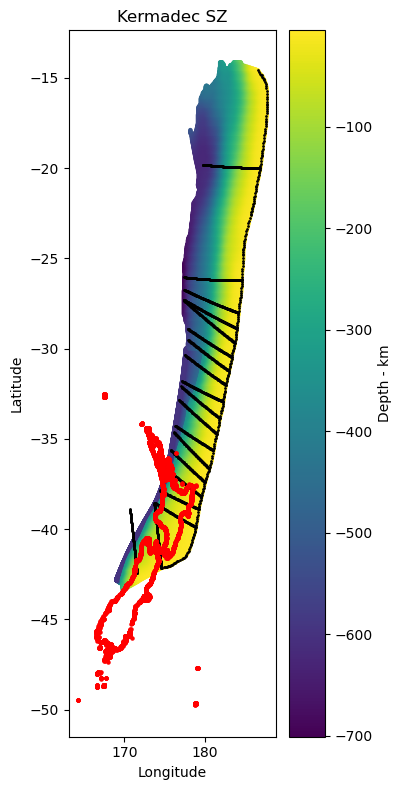

In [11]:
data_dir_path = "../data/"
coast_arr = np.loadtxt(fname=data_dir_path + "coastline.txt")
slab2_cont = np.loadtxt(fname=data_dir_path + "slab2_tonga.in", delimiter='\t', comments='>', dtype=float)

slab2_depth = np.loadtxt(fname=data_dir_path + "combined_slab2.txt")
slab2_contours = np.array(sorted(slab2_cont, key=lambda x: x[1], reverse=True))
trench_contour = data = np.loadtxt(fname=data_dir_path + "trench_contour.csv", delimiter=',')[0:270]

depth_contour = -20
number_of_profiles = 20
profile_spacing = 5
lon_spacing = 0.1
lat_spacing = 0.1
max_distance_point = 5
regional_lon = [170, 190]
regional_lat = [-42.9, -26]
profiles_output_dir = 'profiles_for_worldbuilder'

draw_profiles = True

delete_indices = [1, 2, 3, 4, 20]

if draw_profiles:
    profile_maker.profile_generator(slab2_depth, trench_contour, profiles_output_dir, depth_contour, number_of_profiles, profile_spacing, regional_lon, regional_lat, \
                                    lon_spacing, lat_spacing, max_distance_point, 90, 'East', use_trench=True)
    
    for j, file in enumerate(np.sort(os.listdir(profiles_output_dir + '/geographic'))):
        if j in delete_indices:
            sys('rm ' + profiles_output_dir + '/geographic/' + file)


    geodesic = pyproj.Geod(ellps='WGS84')
    
    fwd_az1, back_az1, dist1 = geodesic.inv(trench_contour[6, 0], trench_contour[6, 1], trench_contour[0, 0], trench_contour[0, 1])
    
    a = pygmt.project(center=[trench_contour[0, 0], trench_contour[0, 1]], \
                      azimuth=fwd_az1, generate=250, length=[0, 250], unit=True).to_numpy()
    sys("cp " + profiles_output_dir + "/geographic/profile_00000.txt " + profiles_output_dir + "/geographic/profile_00001.txt")
    first_drawn_profile = np.loadtxt(fname=profiles_output_dir + "/geographic/profile_00001.txt", usecols=[0, 1, 2])
    southwest_extend_profile = np.copy(first_drawn_profile)
    southwest_extend_profile[:, 0] -= (a[0][0] - a[1][0])
    southwest_extend_profile[:, 1] -= (a[0][1] - a[1][1])
    np.savetxt(fname=profiles_output_dir + "/geographic/profile_00000.txt", X=southwest_extend_profile)

    last_drawn_profile = np.loadtxt(fname=profiles_output_dir + "/geographic/profile_00168.txt", usecols=[0, 1, 2])
    north_extend_profile = np.copy(last_drawn_profile)
    trench_ind = np.abs(trench_contour[:, 1] + 20).argmin()
    dlon = abs(trench_contour[:, 0][trench_ind] - last_drawn_profile[0][0])
    dlat = abs(trench_contour[:, 1][trench_ind] - last_drawn_profile[0][1])
    north_extend_profile[:, 0] += dlon
    north_extend_profile[:, 1] += dlat
    np.savetxt(fname=profiles_output_dir + "/geographic/profile_00169.txt", X=north_extend_profile)





plt.figure(dpi=100, figsize=(4, 8))
plt.title('Kermadec SZ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(slab2_depth[:,0], slab2_depth[:,1], c=slab2_depth[:,2], s = 5)
plt.colorbar(label = 'Depth - km')

i = 0
for file in np.sort(os.listdir(profiles_output_dir + '/geographic')):
    profile_file = np.loadtxt(fname=profiles_output_dir + '/geographic/' + file)
    plt.scatter(profile_file[:, 0], profile_file[:, 1], c = 'k', s=1)
    if i == 20:
        plt.scatter(profile_file[:, 0], profile_file[:, 1], c = 'r', s = 4)
        print(np.min(profile_file[:, 0]), np.max(profile_file[:, 0]))
        print(np.min(profile_file[:, 1]), np.max(profile_file[:, 1]))
    i += 1

plt.scatter(trench_contour[:, 0], trench_contour[:, 1], s=1, c='black')
plt.scatter(coast_arr[:, 0], coast_arr[:, 1], s = 5, c='red')
plt.tight_layout()
plt.show()

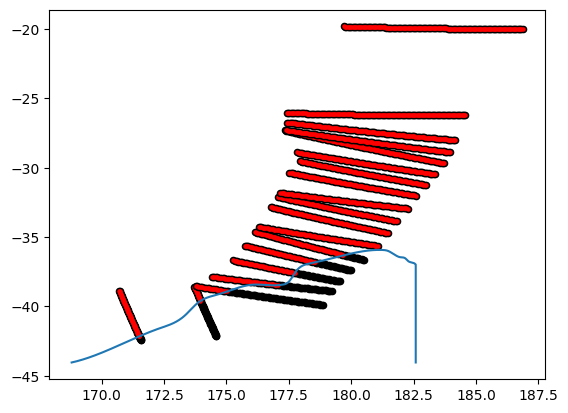

In [12]:
plateau_output_dir = "plateau_directory"
plateau_edge_file = data_dir_path + "plateau_line.txt"
plateau_rotation = 90
geographic_profiles_dir = profiles_output_dir + '/geographic'
create_plots = True
profile_maker.hikurangi_plateau_depth(plateau_edge_file, geographic_profiles_dir, plateau_rotation, regional_lon, regional_lat, plateau_output_dir, create_plots)
plateau_edge = np.loadtxt(fname=plateau_edge_file)
plt.plot(plateau_edge[:, 0], plateau_edge[:, 1])

In [13]:
dir_path = "../data/DEP_zealith2/" # Load in the regional dataset from Donna
AUS_eastprov = np.loadtxt(fname=data_dir_path + "DEP_zealith2/AUS_lith75.xyd", comments='>') + 1e-7
AUS_MB = np.loadtxt(fname=data_dir_path + "DEP_zealith2/AUS_lith150.xyd", comments='>')
AUS_westprov = np.loadtxt(fname=data_dir_path + "DEP_zealith2/AUS_lith100.xyd", comments='>') + 1e-7
AUS_TVZ = np.loadtxt(fname=data_dir_path + "DEP_zealith2/AUS_lith50.xyd", comments='>') + 1e-7

PAC_eastprov = np.loadtxt(fname=data_dir_path + "DEP_zealith2/PAC_lith75.xyd", comments='>')
PAC_MB = np.loadtxt(fname=data_dir_path + "DEP_zealith2/PAC_lith150.xyd", comments='>')
PAC_westprov = np.loadtxt(fname=data_dir_path + "DEP_zealith2/PAC_lith100.xyd", comments='>')

profile_directory = profiles_output_dir + '/geographic/' # Specify the directory of the cartesian profiles

ocean_extent_arr = np.loadtxt(fname=data_dir_path + "DEP_zealith2/subducting_plate_boundary.xyd")
cont_extent_arr = np.loadtxt(fname=data_dir_path + "DEP_zealith2/overriding_plate_boundary.xyd")

# extract the location of the trench by finding the Eastern-most point of each profile
trench_arr = []
for file in np.sort(os.listdir(profile_directory)):
    profile_file = np.loadtxt(fname=profile_directory + file)
    trench_ind = np.where(profile_file[:, 0] == np.max(profile_file[:, 0]))
    trench_arr.append([profile_file[:, 0][trench_ind][0], profile_file[:, 1][trench_ind][0]])

trench_arr = np.array(trench_arr)
diffs = np.zeros(len(trench_arr))
for i in range(len(trench_arr)):
    diffs[i] = np.sqrt( (cont_extent_arr[:, 0][-1] - trench_arr[:, 0][i])**2 + (cont_extent_arr[:, 1][-1] - trench_arr[:, 1][i])**2 )
    index_of_trench = np.where(diffs == np.min(diffs))

connector = []
for i in range(len(trench_arr)):
    if trench_arr[:, 1][i] >= trench_arr[:, 1][index_of_trench]:
        connector.append(trench_arr[i])

cont_extent_arr = np.concatenate( (cont_extent_arr, connector))

diffs = np.zeros(len(trench_arr))
for i in range(len(trench_arr)):
    diffs[i] = np.sqrt( (ocean_extent_arr[:, 0][-1] - trench_arr[:, 0][i])**2 + (ocean_extent_arr[:, 1][-1] - trench_arr[:, 1][i])**2 )
    index_of_trench = np.where(diffs == np.min(diffs))

connector = []
for i in range(len(trench_arr)):
    if trench_arr[:, 1][i] >= trench_arr[:, 1][index_of_trench]:
        connector.append(trench_arr[i])

ocean_extent_arr = np.concatenate( (ocean_extent_arr, connector) )

########################################################### START FILE ########################################################################################

wb_file_path = 'world_builder_files/10km_weakzone_extend_north_south.wb'
sys('rm ' + wb_file_path)
world_builder_file = open(wb_file_path, 'a+')
world_builder_file.write('{\n')
world_builder_file.write('  "version":"0.6",\n')
world_builder_file.write('  "coordinate system":{"model":"spherical", "depth method":"begin at end segment"},\n')
world_builder_file.write('  "features":\n')
world_builder_file.write('  [\n\n')

########################################################### UPPER MANTLE ########################################################################################

thermal_model = 'plate model'

min_lat = -55
max_lat = -20

min_lon = 150
max_lon = 210

lat_bounds = [min_lat - 5, max_lat + 5]
lon_bounds = [min_lon - 5, max_lon + 5]

xshift = 0
yshift = 0

feature_type = 'mantle layer'
feature_description = 'Upper Mantle'
min_depth = 0
max_depth = 660e3
coordinates = [[np.min(lon_bounds), np.min(lat_bounds)], [np.min(lon_bounds), np.max(lat_bounds)], \
               [np.max(lon_bounds), np.max(lat_bounds)], [np.max(lon_bounds), np.min(lat_bounds)]]

composition_model = 'uniform'
composition_0 = 0
max_depth_0 = 660e3
min_depth_0 = 0

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(feature_type, feature_description, min_depth, max_depth, coordinates, dip_point=0))
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_0, max_depth_0, min_depth_0))
world_builder_file.write('},\n\n')

########################################################### LOWER MANTLE ########################################################################################

feature_type = 'mantle layer'
feature_description = 'Lower Mantle'
min_depth = 660e3
max_depth = 2891e3

composition_model = 'uniform'
composition_1 = 1
max_depth_1 = 2891e3
min_depth_1 = 660e3

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(feature_type, feature_description, min_depth, max_depth, coordinates, dip_point=0))
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_1, max_depth_1, min_depth_1))
world_builder_file.write('},\n\n')

########################################################### EAST PROV PAC ########################################################################################

feature_type = 'continental plate'
feature_description = 'East Province PAC'
min_depth = 0
max_depth = 100e3

temp_model = 'linear'
temp_max = 100e3
temp_min = 0.0
bot_temp = -1
top_temp = 300

composition_model = 'uniform'
composition_3 = 3
max_depth_3 = 100e3
min_depth_3 = 0
layer_coords = np.array2string(PAC_eastprov, separator=',')

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(feature_type, feature_description, min_depth, max_depth, layer_coords, dip_point=0))
world_builder_file.write(wb_writer.linear_model(temp_model, temp_max, temp_min, bot_temp, top_temp, 'both'))
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_3, max_depth_3, min_depth_3))
world_builder_file.write('},\n\n')

########################################################### EAST PROV AUS ########################################################################################

feature_type = 'continental plate'
feature_description = 'East Province AUS'
min_depth = 0
max_depth = 100e3

temp_model = 'linear'
temp_max = 100e3
temp_min = 0.0
bot_temp = -1
top_temp = 300

composition_model = 'uniform'
composition_4 = 4
max_depth_4 = 100e3
min_depth_4 = 0
layer_coords = np.array2string(AUS_eastprov, separator=',')

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(feature_type, feature_description, min_depth, max_depth, layer_coords, dip_point=0))
world_builder_file.write(wb_writer.linear_model(temp_model, temp_max, temp_min, bot_temp, top_temp, 'both'))
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_4, max_depth_4, min_depth_4))
world_builder_file.write('},\n\n')

########################################################### BATHOLITH PAC ########################################################################################

feature_type = 'continental plate'
feature_description = 'Median Batholith PAC'
min_depth = 0
max_depth = 100e3

temp_model = 'linear'
temp_max = 100e3
temp_min = 0.0
bot_temp = -1
top_temp = 300

composition_model = 'uniform'
composition_5 = 5
max_depth_5 = 100e3
min_depth_5 = 0
layer_coords = np.array2string(PAC_MB, separator=',')

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(feature_type, feature_description, min_depth, max_depth, layer_coords, dip_point=0))
world_builder_file.write(wb_writer.linear_model(temp_model, temp_max, temp_min, bot_temp, top_temp, 'both'))
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_5, max_depth_5, min_depth_5))
world_builder_file.write('},\n\n')

########################################################### BATHOLITH AUS ########################################################################################

feature_type = 'continental plate'
feature_description = 'Median Batholith AUS'
min_depth = 0
max_depth = 100e3

temp_model = 'linear'
temp_max = 100e3
temp_min = 0.0
bot_temp = -1
top_temp = 300

composition_model = 'uniform'
composition_6 = 6
max_depth_6 = 100e3
min_depth_6 = 0
layer_coords = np.array2string(AUS_MB, separator=',')

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(feature_type, feature_description, min_depth, max_depth, layer_coords, dip_point=0))
world_builder_file.write(wb_writer.linear_model(temp_model, temp_max, temp_min, bot_temp, top_temp, 'both'))
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_6, max_depth_6, min_depth_6))
world_builder_file.write('},\n\n')

########################################################### TAUPO ########################################################################################

feature_type = 'continental plate'
feature_description = 'Taupo Volcanic Zone'
min_depth = 0
max_depth = 50e3

temp_model = 'linear'
temp_max = 50e3
temp_min = 0.0
bot_temp = -1
top_temp = 300

composition_model = 'uniform'
composition_7 = 7
max_depth_7 = 50e3
min_depth_7 = 0
layer_coords = np.array2string(AUS_TVZ, separator=',')

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(feature_type, feature_description, min_depth, max_depth, layer_coords, dip_point=0))
world_builder_file.write(wb_writer.linear_model(temp_model, temp_max, temp_min, bot_temp, top_temp, 'both'))
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_7, max_depth_7, min_depth_7))
world_builder_file.write('},\n\n')

########################################################### WEST PROV PAC ########################################################################################

feature_type = 'continental plate'
feature_description = 'West Province PAC'
min_depth = 0
max_depth = 100e3

temp_model = 'linear'
temp_max = 100e3
temp_min = 0.0
bot_temp = -1
top_temp = 300

composition_model = 'uniform'
composition_8 = 8
max_depth_8 = 100e3
min_depth_8 = 0
layer_coords = np.array2string(PAC_westprov, separator=',')

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(feature_type, feature_description, min_depth, max_depth, layer_coords, dip_point=0))
world_builder_file.write(wb_writer.linear_model(temp_model, temp_max, temp_min, bot_temp, top_temp, 'both'))
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_8, max_depth_8, min_depth_8))
world_builder_file.write('},\n\n')

########################################################### WEST PROV AUS ########################################################################################

feature_type = 'continental plate'
feature_description = 'West Province AUS'
min_depth = 0
max_depth = 100e3

temp_model = 'linear'
temp_max = 100e3
temp_min = 0.0
bot_temp = -1
top_temp = 300

composition_model = 'uniform'
composition_9 = 9
max_depth_9 = 100e3
min_depth_9 = 0
layer_coords = np.array2string(AUS_westprov, separator=',')

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(feature_type, feature_description, min_depth, max_depth, layer_coords, dip_point=0))
world_builder_file.write(wb_writer.linear_model(temp_model, temp_max, temp_min, bot_temp, top_temp, 'both'))
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_9, max_depth_9, min_depth_9))
world_builder_file.write('},\n\n')

########################################################### OVERRIDING PLATE ########################################################################################

feature_type = 'oceanic plate'
feature_description = 'Overriding General plate'

cont_coords = [[np.min(lon_bounds), np.min(lat_bounds)], [cont_extent_arr[0][0], np.min(lat_bounds)]]
for i in range(len(cont_extent_arr)):
    cont_coords.append([cont_extent_arr[i][0], cont_extent_arr[i][1]])
cont_coords.append([cont_extent_arr[-1][0], np.max(lat_bounds)])
cont_coords.append([np.min(lon_bounds), np.max(lat_bounds)]) 

min_depth = 0
max_depth = 120e3

temp_max = 120e3
temp_min = 0.0
bot_temp = -1
top_temp = 300
spr_vel = 0.014

overriding_ridge_coords = [[[176.75, -37.5], [179, -35], \
                            [181, -30], [182, -25], \
                            [184, -20], [186, np.max(lat_bounds)]]]
composition_model = 'uniform'
composition_2 = 2
max_depth_2 = 120e3
min_depth_2 = 0

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(feature_type, feature_description, min_depth, max_depth, cont_coords, dip_point=0))
world_builder_file.write(wb_writer.cooling_model(thermal_model, temp_max, temp_min, bot_temp, top_temp, spr_vel, overriding_ridge_coords, first_or_last='both'))
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_2, max_depth_2, min_depth_2))
world_builder_file.write('},\n\n')

########################################################### UNSUBDUCTIED PACIFIC PLATE ########################################################################################

feature_type = 'oceanic plate'
feature_description = 'Subducting General plate'

ocean_coords = [[np.max(lon_bounds), np.min(lat_bounds)], [ocean_extent_arr[0][0], np.min(lat_bounds)]]
for i in range(len(ocean_extent_arr)):
    ocean_coords.append([ocean_extent_arr[i][0], ocean_extent_arr[i][1]])
ocean_coords.append([ocean_extent_arr[-1][0], np.max(lat_bounds)])
ocean_coords.append([np.max(lon_bounds), np.max(lat_bounds)]) 

min_depth = 0
max_depth = 120e3

temp_max = 120e3
temp_min = 0.0
bot_temp = -1
top_temp = 300
spr_vel = 0.045
subducting_ridge_coords = [[[180 + 67, np.max(lat_bounds)], [180 + 67, np.max(lat_bounds)]]]

composition_model = 'uniform'
composition_10 = 10
max_depth_10 = 120e3
min_depth_10 = 10e3

composition_11 = 11
max_depth_11 = 10e3
min_depth_11 = 0


world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(feature_type, feature_description, min_depth, max_depth, ocean_coords, dip_point=0))
world_builder_file.write(wb_writer.cooling_model(thermal_model, temp_max, temp_min, bot_temp, top_temp, spr_vel, subducting_ridge_coords, first_or_last='both'))
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_10, max_depth_10, min_depth_10, first_or_last='first'))
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_11, max_depth_11, min_depth_11, first_or_last='last'))
world_builder_file.write('},\n\n')

########################################################### MEGATRHUST WEAK ZONE ########################################################################################

feature_description = 'Plate Interface'
feature_types = 'subducting plate'

trench_shift = 0.
res = parallel_curves.parallel_curvres = parallel_curves.parallel_curves(trench_arr[:, 0], trench_arr[:, 1], d=trench_shift, make_plot=False, flag1=False)
weak_trench_x = res['x_inner']
weak_trench_y = res['y_inner']
weak_trench_x = res['x_inner']
weak_trench_y = res['y_inner']

is_subducting = True
min_depth = 0
max_depth = 120e3

segment_thickness = 120e3
composition_model = 'uniform'
composition_12 = 12
max_depth_12 = 0
min_depth_12 = -10e3

dip_point = [0, -25]
top_truncation = [-120e3]

weak_zone_coordinates =  []
for i in range(len(weak_trench_x)):
    weak_zone_coordinates.append( [weak_trench_x[i], weak_trench_y[i]] )

world_builder_file.write('    {' + wb_writer.model_feature_string(feature_types, feature_description, min_depth, max_depth, \
                                                                  weak_zone_coordinates, dip_point, is_subducting=True))

wb_writer.segment_section(world_builder_file, profile_directory, xshift, yshift, segment_thickness, top_truncation, coordinate_system='Spherical', fill_segments='end')

world_builder_file.write('    ],\n')
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_12, max_depth_12, min_depth_12, \
                                                              is_subducting=True, first_or_last='both', operation='replace'))
world_builder_file.write('},\n\n')

########################################################### SUBDUCTING SLAB #######################################################################################

feature_description = 'Kermadec Slab'
feature_types = 'subducting plate'

feature_coordinates =  []
for i in range(len(trench_arr)):
    feature_coordinates.append( [trench_arr[:, 0][i] + 0.01, trench_arr[:, 1][i]] )


segment_thickness = 120e3
is_subducting = True
density = 3300
couple_depth = 80e3
taper = 50e3
max_slab_top = 120e3
min_slab_top = -240e3
dip_point = [0, -25]
top_truncation = [-120e3]
first_or_last = 'both'
composition_model = 'uniform'

world_builder_file.write('    {' + wb_writer.model_feature_string(feature_types, feature_description, 0, 10000e3, feature_coordinates, dip_point, is_subducting=True))
wb_writer.segment_section(world_builder_file, profile_directory, xshift, yshift, segment_thickness, top_truncation, 'Spherical', fill_segments='end')
world_builder_file.write('    ],\n')
world_builder_file.write(wb_writer.mass_conserving_model(thermal_model, density, spr_vel, couple_depth, subducting_ridge_coords, taper, max_slab_top, min_slab_top, first_or_last))
world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_10, 100000e3, 0, is_subducting=True, first_or_last='both'))
world_builder_file.write('},\n\n')

########################################################### SUBDUCTING CRUST #######################################################################################

feature_description = 'Kermadec Crust'
feature_types = 'subducting plate'
plateau_directory_path = plateau_output_dir + '/geographic'

segment_thickness = []
for file in np.sort(os.listdir(plateau_directory_path)):
    file_loc = os.path.join(plateau_directory_path, file)
    track_z = np.abs(np.loadtxt(fname=file_loc, usecols=2))
    thick_element = [ [20e3, np.min(track_z)], [10e3, 2000] ]
    segment_thickness.append(thick_element)
segment_thickness = np.array(segment_thickness)

composition_model = 'uniform'
composition_11 = 11
max_depth_11 = 100000e3
min_depth_11 = 0

max_crust_depth = 20e3
min_crust_depth = 0

world_builder_file.write('    {' + wb_writer.model_feature_string(feature_types, feature_description, min_depth_11, max_depth_11, \
                                                                  feature_coordinates, dip_point, is_subducting))
wb_writer.segment_section(world_builder_file, profile_directory, xshift, yshift, segment_thickness, top_truncation, 'Spherical', fill_segments='end')
world_builder_file.write('    ],\n')

world_builder_file.write(wb_writer.composition_feature_string(composition_model, composition_11, max_crust_depth, min_crust_depth, is_subducting=True, first_or_last='both'))
world_builder_file.write('}\n\n')

########################################################### CLOSE FILE #######################################################################################

world_builder_file.write('')
world_builder_file.write(']\n')
world_builder_file.write('}')
world_builder_file.close()

rm: world_builder_files/10km_weakzone_extend_north_south.wb: No such file or directory
